# Assignment 6

## Cross Validation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

#### Exercise 1

* Load Dataset

In [2]:
x_train = pd.read_csv("E:\LABS\data_set\Min\mnist_train.csv", sep= ",")

In [3]:
x_train.shape

(60000, 785)

In [4]:
x_test = pd.read_csv("E:\LABS\data_set\Min\mnist_test.csv", sep= ",")
x_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_test.shape

(10000, 785)

#### Exercise 2

* Visualize the data columns

In [6]:
(x_train1, y_train1), (x_valid1, y_valid1) = mnist.load_data()

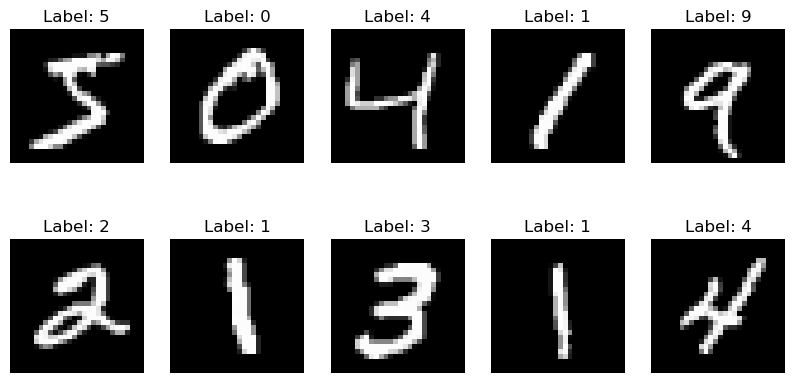

In [7]:

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train1[i], cmap='gray')
    plt.title(f"Label: {y_train1[i]}")
    plt.axis('off')

plt.show()


* Visuailizing data columns

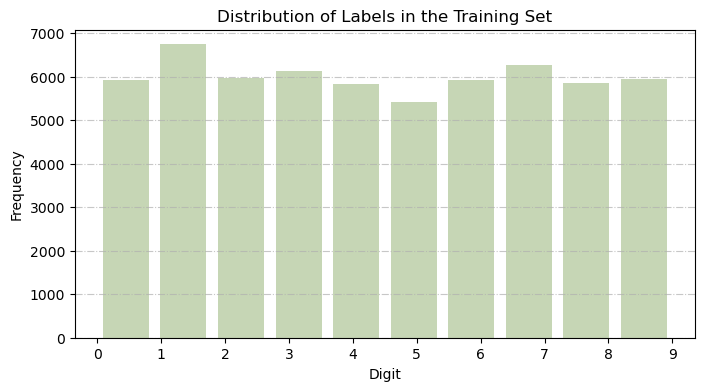

In [60]:
# Visualize the distribution of labels in the training set

plt.figure(figsize=(8, 4))
plt.hist(y_train1, bins=10, rwidth=0.8, alpha=0.75, color='#B3C99C')
plt.xticks(np.arange(0, 10), [str(i) for i in range(10)])
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Distribution of Labels in the Training Set')
plt.grid(axis='y', linestyle='-.', alpha=0.7)
plt.show()

#### Exercise 3

* Check the class imbalance

In [9]:
# Count the occurrences of each class label in the training set
unique_classes_train, counts_train = np.unique(y_train1, return_counts=True)

# Print the class distribution for the training set
print("Training Set Class Distribution:")
for label, count in zip(unique_classes_train, counts_train):
    print(f"{label} : {count}")

Training Set Class Distribution:
0 : 5923
1 : 6742
2 : 5958
3 : 6131
4 : 5842
5 : 5421
6 : 5918
7 : 6265
8 : 5851
9 : 5949


* mostly the class was the balanced dataset , no need to balanced it.

#### Exercise 4

* Compare Leave-one-out with 2, 3, 5, and 10-Folds Cross Validation. 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict

In [14]:
y_train = x_train["label"]
X_train = x_train.drop(columns=["label"])
y_test = x_test["label"]
X_test = x_test.drop(columns=["label"])

In [15]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
# X_train = X_train.values
# y_train = y_train.values

# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_train data type:", X_train.dtype)
# print("y_train data type:", y_train.dtype)

In [26]:
CV_2 = cross_val_predict(KNN, X_train, y_train, cv=2)
CV_2
accuracies_2 = cross_val_score(KNN, X_train, y_train, cv=2, scoring='accuracy').mean()
accuracies_2

print("CV_2 : ", CV_2)
print("accuracies_2 : ", accuracies_2)

CV_2 :  [5 0 4 ... 5 6 8]
accuracies_2 :  0.96365


In [27]:
CV_3 = cross_val_predict(KNN, X_train, y_train, cv=3)
CV_3
accuracies_3 = cross_val_score(KNN, X_train, y_train, cv=3, scoring='accuracy').mean()
accuracies_3

print("CV_3 : ", CV_3)
print("accuracies_3 : ", accuracies_3)

CV_3 :  [5 0 4 ... 5 6 8]
accuracies_3 :  0.9674166666666667


In [28]:
CV_5 = cross_val_predict(KNN, X_train, y_train, cv=5)
CV_5
accuracies_5 = cross_val_score(KNN, X_train, y_train, cv=5, scoring='accuracy').mean()
accuracies_5

print("CV_5 : ", CV_5)
print("accuracies_5 : ", accuracies_5)

CV_5 :  [5 0 4 ... 5 6 8]
accuracies_5 :  0.9692833333333335


In [29]:
CV_10 = cross_val_predict(KNN, X_train, y_train, cv=10)
CV_10
accuracies_10 = cross_val_score(KNN, X_train, y_train, cv=10, scoring='accuracy').mean()
accuracies_10

CV_2 :  [5 0 4 ... 5 6 8]
accuracies_2 :  0.96365


In [30]:
print("CV_10 : ", CV_10)
print("accuracies_10 : ", accuracies_10)

CV_10 :  [5 0 4 ... 5 6 8]
accuracies_10 :  0.9700499999999999


Cross-Validation Results (with class imbalance handling):

* 2-Fold Cross-Validation Accuracy: 0.96365
* 3-Fold Cross-Validation Accuracy: 0.9674166666666667
* 5-Fold Cross-Validation Accuracy: 0.9692833333333335
* 10-Fold Cross-Validation Accuracy: 0.9700499999999999

#### Exercise 5

* Observe the pattern as the number of folds increases.

* As the number of folds increases, the cross-validation accuracy generally shows a trend of improvement. Specifically, the accuracy tends to increase from 2-fold to 3-fold, 3-fold to 5-fold, and so on. This pattern is consistent with what you'd typically expect in cross-validation. With more folds, the model is trained and evaluated on a larger variety of data subsets, which can lead to a more robust assessment of model performance.

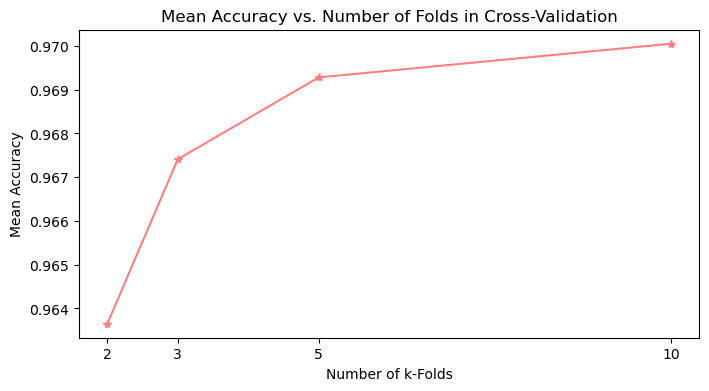

In [35]:
k_values = [2, 3, 5, 10]
mean_accuracies =[0.96365,0.96741,0.96928,0.97005]

plt.figure(figsize=(8, 4))
plt.plot(k_values, mean_accuracies , marker="*" , c= "#FF8080")
plt.xlabel('Number of k-Folds')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Number of Folds in Cross-Validation')
plt.xticks(k_values)
plt.show()

#### Exercise 6

* Identify the good value of k for better accuracy.

* It appears that 10-fold cross-validation yields the highest accuracy of approximately 97%. However, it's essential to note that the difference in accuracy between different values of k (e.g., 3-fold, 5-fold, and 10-fold) is relatively small. Therefore, the choice of the "best" k-value depends on various factors, including the computational resources available, the size of dataset. If a quicker assessment of model performance need then a lower k-value may be acceptable. if their is better computational resources and want a more reliable estimate of performance, a higher k-value like 10-fold may be preferable.

In [40]:
# Convert Pandas DataFrames to NumPy arrays if needed
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_test data type:", X_test.dtype)
print("y_test data type:", y_test.dtype)

X_test shape: (10000, 784)
y_test shape: (10000,)
X_test data type: int64
y_test data type: int64


In [41]:
k_values = range(1, 21)
accuracy_scores = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    accuracy = knn_classifier.score(X_test, y_test)
    accuracy_scores.append(accuracy)
    
accuracy_scores

[0.9691,
 0.9627,
 0.9705,
 0.9682,
 0.9688,
 0.9677,
 0.9694,
 0.967,
 0.9659,
 0.9665,
 0.9668,
 0.9661,
 0.9653,
 0.964,
 0.9633,
 0.9632,
 0.963,
 0.9633,
 0.9632,
 0.9625]

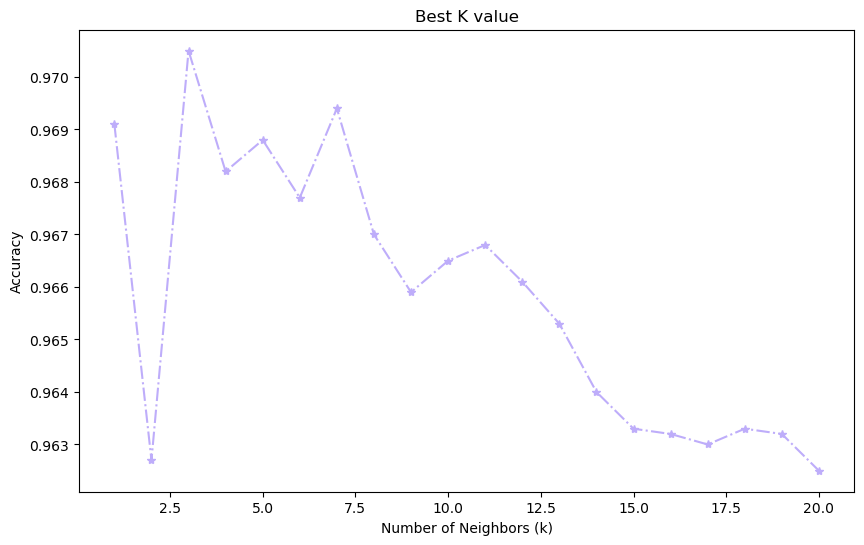

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='*', linestyle='-.', c='#BEADFA')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Best K value')
plt.show()

#### Exercise 7

* Compare the result with and without the class imbalance checking.

In [45]:
!pip install --upgrade imbalanced-learn

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

In [48]:
CV_2_Balanced = cross_val_score(KNN, X_train_resampled, y_train_resampled, cv=2, scoring='accuracy').mean()
CV_2_Balanced

0.9683180065262533

In [49]:
CV_3_Balanced = cross_val_score(KNN, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy').mean()
CV_3_Balanced

0.9715366626201232

In [50]:
CV_5_Balanced = cross_val_score(KNN, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy').mean()
CV_5_Balanced

0.9739394838326906

In [51]:
CV_10_Balanced = cross_val_score(KNN, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy').mean()
CV_10_Balanced

0.9752299021061999

In [52]:
k_values = range(1, 21)
accuracy_scores = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_resampled, y_train_resampled)
    accuracy = knn_classifier.score(X_test_resampled, y_test_resampled)
    accuracy_scores.append(accuracy)

In [56]:
accuracy_scores2 = accuracy_scores
accuracy_scores2

[0.9705726872246696,
 0.9651982378854626,
 0.9713656387665198,
 0.9700440528634361,
 0.9707488986784141,
 0.9703083700440529,
 0.9704845814977974,
 0.9703964757709251,
 0.9699559471365639,
 0.9703964757709251,
 0.9696035242290749,
 0.9682819383259912,
 0.9681057268722467,
 0.9669603524229075,
 0.9670484581497797,
 0.9666960352422908,
 0.9662555066079295,
 0.9659030837004405,
 0.9661674008810572,
 0.9658149779735683]

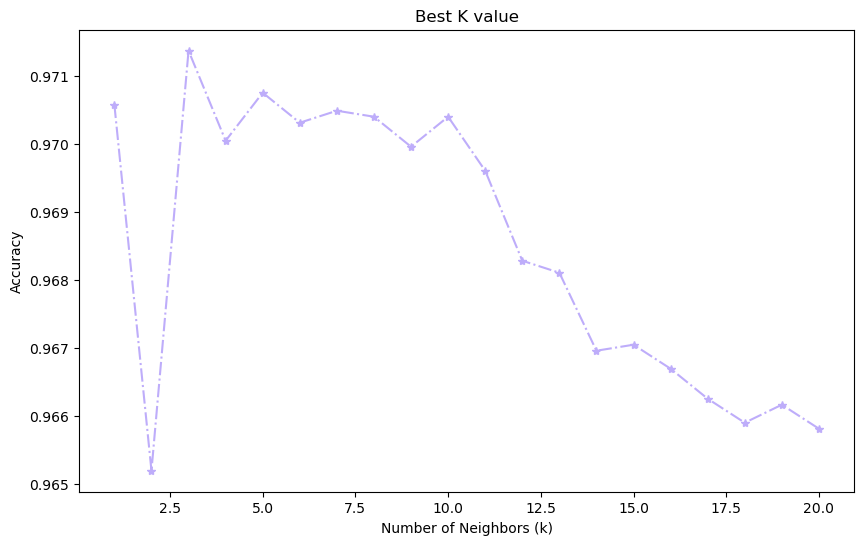

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='*', linestyle='-.', c='#BEADFA')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Best K value')
plt.show()

### k - fold values with class imbalance

* 2-Fold Cross-Validation Accuracy: 0.96365
* 3-Fold Cross-Validation Accuracy: 0.9674166666666667
* 5-Fold Cross-Validation Accuracy: 0.9692833333333335
* 10-Fold Cross-Validation Accuracy: 0.9700499999999999

### k - fold values with balanced class

* 2 - Fold Cross-Validation Accuracy with SMOTE: 0.9683180065262533
* 3 - Fold Cross-Validation Accuracy with SMOTE: 0.9715366626201232
* 5 - Fold Cross-Validation Accuracy with SMOTE: 0.9739394838326906
* 10 - Fold Cross-Validation Accuracy with SMOTE: 0.9752299021061999

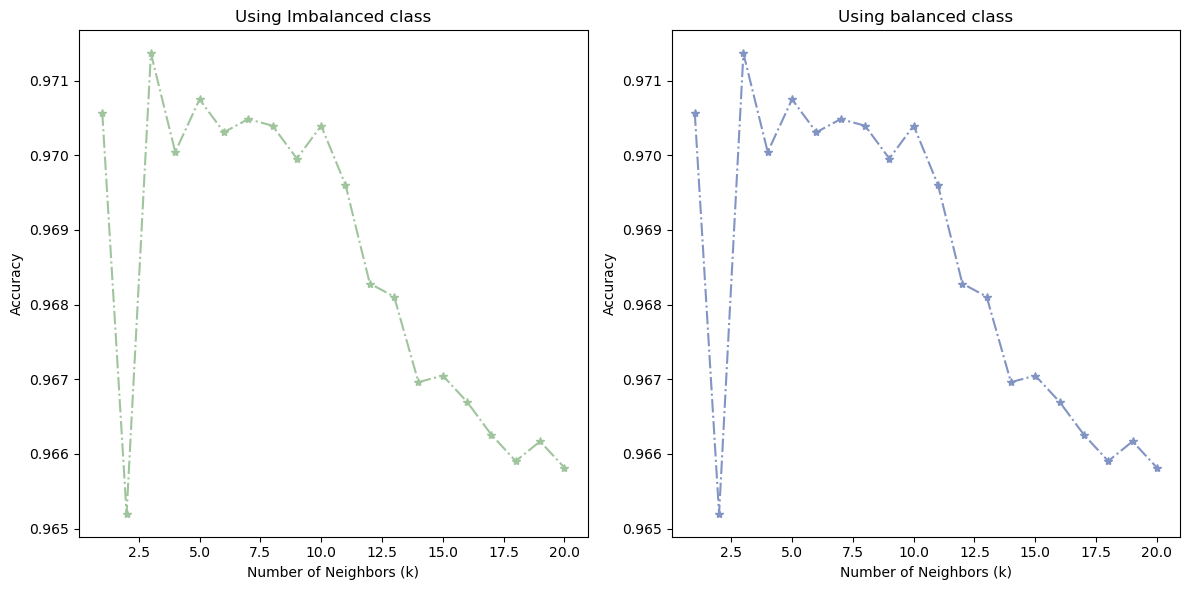

In [59]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(k_values, accuracy_scores, marker='*', linestyle='-.', c='#A0C49D')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Using Imbalanced class')

plt.subplot(122)
plt.plot(k_values, accuracy_scores2, marker='*', linestyle='-.', c='#8294C4')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Using balanced class')

plt.tight_layout()
plt.show()

* When SMOTE was used to balance the dataset, slightly higher accuracy increased in the model's performance during cross-validation. However, the original dataset already had relatively balanced classes, so the improvement wasn't as dramatic. The reason is that SMOTE is especially helpful when dealing with severe class imbalances, where one class is significantly smaller than the others. In such cases, SMOTE can generate synthetic samples to create a more balanced distribution, resulting in more pronounced accuracy gains.